# California Housing Price Prediction


## Importing Libraries

In [1]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
import copy


## Reading data

In [2]:
#read the data file
housing = pd.read_csv("dataset_with_county_city.csv")

# 1. Data preprocessing
Basic Data Analysis or Exploratory Data Analysis

## 1.1 Data observation

In [3]:
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))


The number of rows and colums are (20640, 12) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'county', 'city'],
      dtype='object')


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county,city
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda,Berkeley
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda,Piedmont
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda,Piedmont
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda,Berkeley
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda,Berkeley


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  county              20635 non-null  object 
 11  city                20640 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.9+ MB


In [54]:
housing['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [59]:
Counter(housing['total_bedrooms'])

Counter({129.0: 19,
         1106.0: 4,
         190.0: 30,
         235.0: 34,
         280.0: 55,
         213.0: 17,
         489.0: 35,
         687.0: 8,
         665.0: 17,
         707.0: 10,
         434.0: 30,
         752.0: 11,
         474.0: 25,
         191.0: 26,
         626.0: 16,
         283.0: 36,
         347.0: 41,
         293.0: 33,
         455.0: 24,
         298.0: 35,
         184.0: 22,
         367.0: 32,
         541.0: 20,
         337.0: 30,
         437.0: 34,
         123.0: 11,
         244.0: 34,
         421.0: 35,
         492.0: 29,
         160.0: 14,
         447.0: 37,
         481.0: 28,
         409.0: 34,
         366.0: 35,
         574.0: 20,
         282.0: 42,
         432.0: 23,
         390.0: 44,
         330.0: 33,
         715.0: 15,
         419.0: 35,
         311.0: 36,
         202.0: 29,
         420.0: 35,
         322.0: 46,
         312.0: 44,
         195.0: 21,
         375.0: 38,
         453.0: 24,
         456.0: 30,
 

#### The median house values are continuous and hence it is a regression problem
#### One of the column is a categorical feature (ocean_proximity)

In [6]:
# #display scatter_matrix also
# fig = plt.figure()
# scatter_matrix(housing,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");


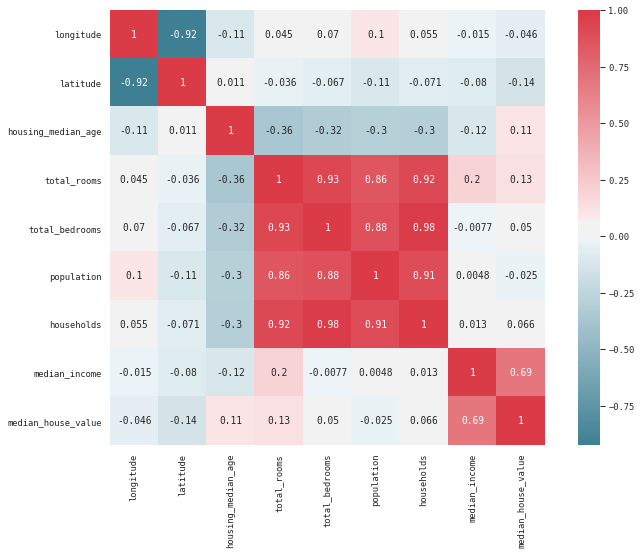

In [7]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

## 1.2 Handling the missing values in the data set

### 1.2.1 Missing data observation

In [8]:
#check wheather there are any missing values or null
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
county                  5
city                    0
dtype: int64

### 1.2.2 Handle column of 'total_bedroomsre' 
Total_bedrooms columns is having 207 missing values

Now we need to impute the missing values

In [9]:
#statistics for missing values
print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [10]:
# replace with median
print(housing.iloc[:,4:5].head())
imputer = SimpleImputer(np.nan,strategy ="median")
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
county                5
city                  0
dtype: int64

### 1.2.3 Delete the missing data in the column "county"

In [11]:
# delete the missing data in the feature "county"
housing.dropna(inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20635 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  object 
 10  county              20635 non-null  object 
 11  city                20635 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.0+ MB


In [12]:
# preprocessed data copy
housing_cat = copy.deepcopy(housing)

### 1.2.4 Digitalize category

In [13]:
# digitalize category
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder
# select the columns with the type of 'object'.  "ocean_proximity", "county", "city"
categorical_features = list(housing.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    housing[feature] = label_encoder_feat[feature].fit_transform(housing[feature])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county,city
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,0,74
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,0,708
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,0,708
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,74
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,74


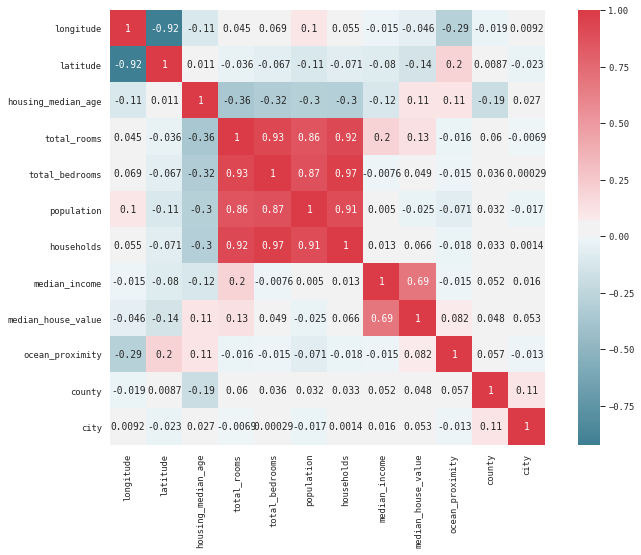

In [14]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

## 1.3 Dataset split
Split the dataset into 80% train and 20% test dataset

In [15]:
X = housing.drop(['median_house_value', 'county', 'city'], axis=1)
y = housing['median_house_value']
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [16]:
#check for rand_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))


X_train shape (16508, 9) and size 148572
X_test shape (4127, 9) and size 37143
y_train shape (16508,) and size 16508
y_test shape (4127,) and size 4127


In [17]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1531,-122.05,37.87,30.0,2296.0,329.0,847.0,322.0,6.7192,3
8306,-118.12,33.75,41.0,2072.0,491.0,742.0,414.0,3.9934,4
6344,-117.74,34.06,4.0,1391.0,506.0,727.0,369.0,1.4722,1
15004,-117.05,32.75,29.0,2767.0,612.0,1437.0,587.0,2.8306,4
5058,-118.35,34.01,33.0,3246.0,601.0,1585.0,603.0,3.6629,0


## 1.4 Scaling data
Standardize the data 

In [18]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-1.23945876  1.04772164  0.10747084 -0.15360768 -0.4985507  -0.52273966
  -0.46644009  1.52356921  1.29549022]
 [ 0.72336701 -0.88349292  0.984056   -0.25703615 -0.10977327 -0.61780514
  -0.22449497  0.07670664  2.00120407]
 [ 0.91315677 -0.73818309 -1.9644577  -0.5714772  -0.07377536 -0.63138592
  -0.34283769 -1.26155367 -0.11593748]
 [ 1.25777504 -1.35223432  0.02778128  0.06386917  0.18060987  0.01143781
   0.23046706 -0.54051099  2.00120407]
 [ 0.60849425 -0.76162016  0.34653952  0.28503989  0.1542114   0.14543488
   0.27254448 -0.09872373 -0.82165133]]
test data
[[ 0.56853851 -0.70537119  0.66529776  0.81788124  0.3797983   0.0874902
   0.43822429  2.36022077 -0.82165133]
 [ 0.8931789  -0.91630482 -1.40663079 -0.29305143 -0.14337132 -0.52092889
  -0.23238448  0.09013595 -0.82165133]
 [ 0.14900323 -0.68662153 -1.08787255  4.05140638  3.82599823  1.7226165
   2.8550457   0.27623545  2.00120407]
 [ 0.64345552 -0.79911947  1.30281423 -0.96949214 -1.01932047 -0.88398849
  -0.99766743

# 2. Perform Random Forest Regression
Perform Random Forest Regression on training data.
Predict output for test dataset using the fitted model.
Print RMSE (root mean squared error) from Random Forest Regression.

In [19]:
# One Hot Encoding
feature = pd.get_dummies(X)
# List of features for later use
feature_list = list(feature.columns)
features_num = np.size(feature_list)
# Convert to numpy arrays
features = np.array(feature)
print("features numbers: ", features_num)

features numbers:  9


In [20]:
#model apply
ntree_list = [10, 20, 50, 100, 200, 500, 1000]
mtry_list = [int(0.5*features_num**0.5), int(features_num**0.5), int(2*features_num**0.5)]
best_ntree = 0
best_mtry = 0
best_error = 9999999999999
best_model = None
best_y_pred = 0
count = 0
total_models = len(ntree_list) * len(mtry_list)
for ntree in ntree_list:
    for mtry in mtry_list:
        count += 1
        print("Training model %i out of %i..." % (count, total_models))
        print("ntree: %i, mtry: %i" % (ntree, mtry))
        rfg = RandomForestRegressor(n_estimators=ntree,
                                      max_features=mtry,
                                      bootstrap = True,
                                      random_state=0)
        rfg.fit(X_train, y_train)
        # predict the test dataset
        y_pred = rfg.predict(X_test)
        # compute square root error
        error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        if error < best_error:
            best_ntree = ntree
            best_mtry = mtry
            best_error = error
            best_model = rfg
            print("Found new optimal model")
            print(best_model)
            print("The error of model RFR : %6f" % best_error)
            print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))
            print("========================================================================")    
#print optimal results
print("========================================================================")
print('Finished tuning model')
print('Optimal model')
print(best_model)
print("The error of model RFR : %6f" % best_error)
print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))

Training model 1 out of 21...
ntree: 10, mtry: 1
Found new optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 59921.003510
best_ntree: 10, best_mtry: 1
Training model 2 out of 21...
ntree: 10, mtry: 3
Found new optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                    

# 3. Result evaluation

## 3.2 Feature Importance

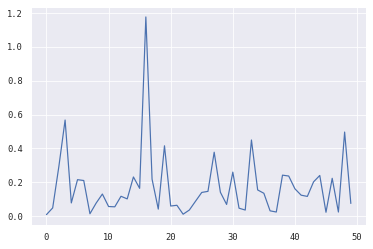

In [21]:
# predict the test dataset
plt.figure()
y_pred = best_model.predict(X_test)
test_1 = pd.DataFrame({'percentage' :(abs(y_pred-y_test)/y_test)})
test_1 = test_1.reset_index()
test_1 = test_1.drop(['index'],axis=1)
plt.plot(test_1[:50])
plt.show()

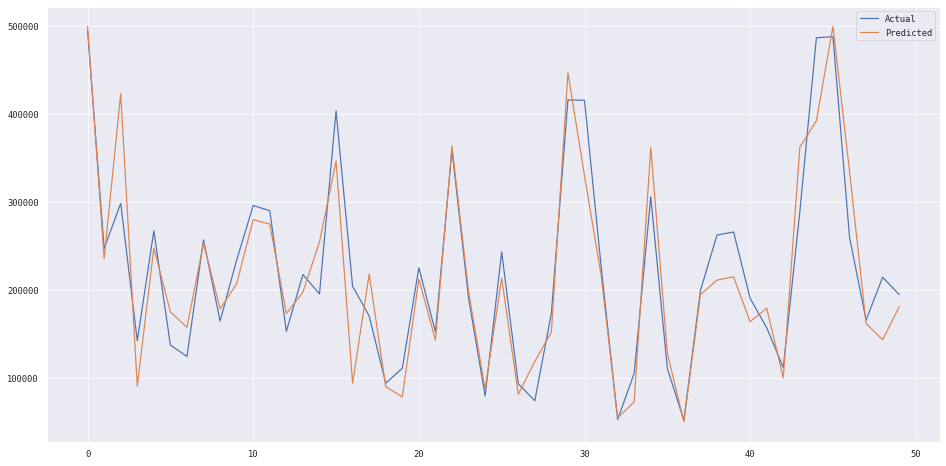

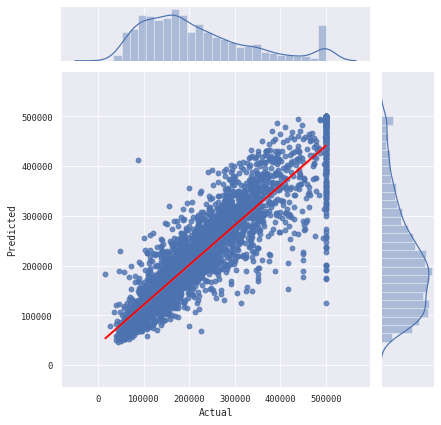

In [22]:
# predict the test dataset
y_pred = best_model.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred, 
                     'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg", joint_kws={'line_kws':{'color':'red'}})

## 3.1 Prediction

In [23]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
# Print out the feature and importances 
[print('Variable: {:30}    Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: median_income                     Importance: 0.47
Variable: longitude                         Importance: 0.13
Variable: latitude                          Importance: 0.12
Variable: ocean_proximity                   Importance: 0.11
Variable: housing_median_age                Importance: 0.05
Variable: population                        Importance: 0.04
Variable: total_rooms                       Importance: 0.03
Variable: total_bedrooms                    Importance: 0.03
Variable: households                        Importance: 0.02


[None, None, None, None, None, None, None, None, None]

In [24]:
def features(feature_importances):
    # sorted importances of features
    feature_list = [x[0] for x in feature_importances][::-1]
    importances = [x[1] for x in feature_importances][::-1]
    # list of x locations for plotting
    y_values = list(range(len(importances)))
    # Make a bar chart
    plt.barh(y_values, importances, orientation = 'horizontal', color = 'r', edgecolor = 'k', linewidth = 1.2)
    # Tick labels for x axis
    plt.yticks(y_values, feature_list, rotation='horizontal')
    # Axis labels and title
    plt.xlabel('Importance') 
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

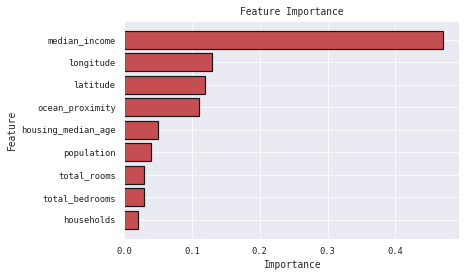

In [25]:
# feature importance
features(feature_importances)

## 3.3 Predict with top features

In [26]:
def top_feature_rfr(X, y, top_features):

    # dataset
    X = X[top_features]
    y = y
    #check for rand_state
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    # data scale
    independent_scaler = StandardScaler()
    X_train = independent_scaler.fit_transform(X_train)
    X_test = independent_scaler.transform(X_test)
    # One Hot Encoding
    feature = pd.get_dummies(X)
    # List of features for later use
    feature_list = list(feature.columns)
    features_num = np.size(feature_list)
    # Convert to numpy arrays
    features = np.array(feature)
    # model apply
    ntree_list = [10, 20, 50, 100, 200, 500, 1000]
    if features_num < 3:
        mtry_list = [1]
    elif features_num < 6:
        mtry_list = [1, 3]
    else:
        mtry_list = [1, 3, 6]
    best_ntree = 0
    best_mtry = 0
    best_error = 9999999999999
    best_model = None
    best_y_pred = 0
    count = 0
    total_models = len(ntree_list) * len(mtry_list)
    print("Training model in total: %i..." % (total_models))
    for ntree in ntree_list:
        for mtry in mtry_list:
            count += 1
            rfg = RandomForestRegressor(n_estimators=ntree,
                                          max_features=mtry,
                                          bootstrap = True,
                                          random_state=0)
            rfg.fit(X_train, y_train)
            # predict the test dataset
            y_pred = rfg.predict(X_test)
            # compute square root error
            error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            if error < best_error:
                best_ntree = ntree
                best_mtry = mtry
                best_error = error
                best_model = rfg   
    #print optimal results
    print("========================================================================")
    print('Finished tuning model')
    print('Optimal model')
    print(best_model)
    print("The error of model RFR : %f" % best_error)
    print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))
    
    # predict the test dataset
    y_pred = best_model.predict(X_test)
    test = pd.DataFrame({'Predicted':y_pred, 
                         'Actual':y_test})
    

    return best_model, test, best_error

In [27]:
from statistics import mean
num_top = []
msqrt_error = []
best_model_ls = []
for top in range(len(feature_importances)):
    print("=========================================================================")
    print("Traning with top %i features" % (top+1))
    top_features_list = [x[0] for x in feature_importances][:top+1]
    print(top_features_list)
    # run Random Forest Regresion
    run_time = 5
    mean_msqrt_error = []
    for i in range(run_time):
        print("Run time: %i" % (i+1))
        top_best_model, top_test, top_error = top_feature_rfr(X, y, top_features_list)
        mean_msqrt_error.append(top_error)
    num_top.append(top+1)
    msqrt_error.append(mean(mean_msqrt_error))
    best_model_ls.append(top_best_model)

print("=========================================================================")
for i in range(len(num_top)):
    print("Root mean square error %i features: %.2f" % (num_top[i], msqrt_error[i]))

Traning with top 1 features
['median_income']
Run time: 1
Training model in total: 7...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 97173.603532
best_ntree: 200, best_mtry: 1
Run time: 2
Training model in total: 7...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_imp

Run time: 2
Training model in total: 14...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 49214.834076
best_ntree: 500, best_mtry: 1
Run time: 3
Training model in total: 14...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
      

Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 47756.742585
best_ntree: 1000, best_mtry: 1
Run time: 4
Training model in total: 14...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_

Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 47724.916910
best_ntree: 1000, best_mtry: 3
Run time: 5
Training model in total: 21...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_

Run time: 5
Training model in total: 21...
Finished tuning model
Optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 49588.199612
best_ntree: 500, best_mtry: 6
Root mean square error 1 features: 95158.00
Root mean square error 2 features: 75524.79
Root mean square error 3 features: 48482.42
Root mean square error 4 features: 45935.62
Root mean square error 5 features: 46521.16
Root mean square error 6 features: 47936.02
Root mean square error 7 features: 47064.24
Root mean square error 8 features: 47785.35
Root mean sq

In [28]:
ave_price = housing['median_house_value'].mean()
print(ave_price)

206882.29033196025


In [29]:
print(num_top)
print(msqrt_error)
print(best_model_ls)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[95157.9964222391, 75524.78736662617, 48482.41586092467, 45935.62487910695, 46521.163832959275, 47936.0179281483, 47064.24111249608, 47785.354446359466, 48787.96257016789]
[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samp

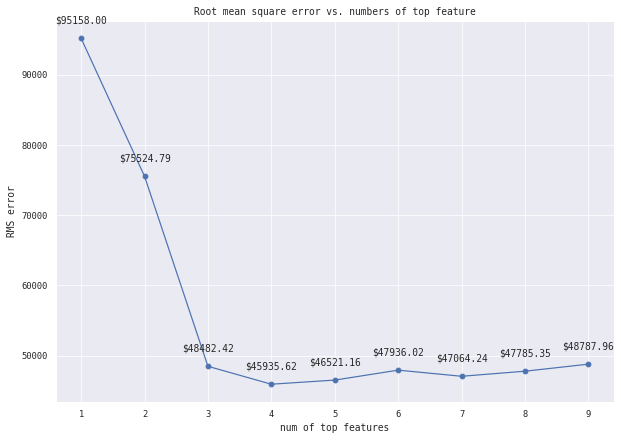

Best model with top 4 features and root mean square error: 45935.62


In [30]:
plt.figure(figsize=(10, 7))
plt.plot(num_top, msqrt_error, marker='o')
plt.xlabel('num of top features')
#plt.xticks(ntree_list, ntree_list, rotation='vertical')
#plt.yticks(accuracies_mtry, accuracies_mtry, rotation='horizontal')
# zip joins x and y coordinates in pairs
for x,y in zip(num_top,msqrt_error):

    label = "{:.2f}%".format((y)/ave_price*100)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
plt.ylabel('Percentange of RMSE/AVE')
plt.title('Root mean square error/average value of houses VS. numbers of top feature')
plt.show()
best_index = msqrt_error.index(min(msqrt_error))
print("Best model with top {} features and root mean square error: {:.2f} %".format(num_top[best_index], msqrt_error[best_index]/ave_price*100))


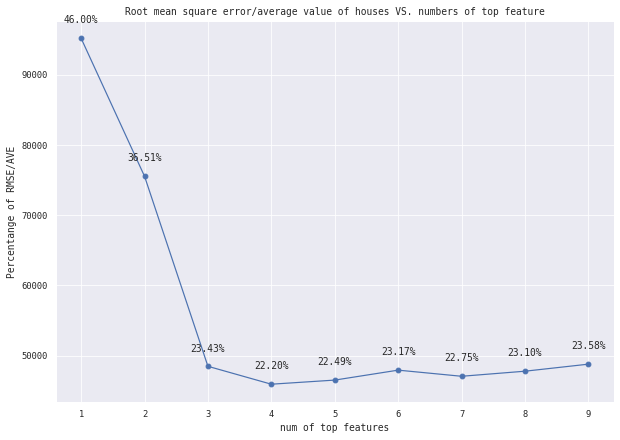

Best model with top 4 features and root mean square error: 22.20 %


In [31]:
plt.figure(figsize=(10, 7))
plt.plot(num_top, msqrt_error, marker='o')
plt.xlabel('num of top features')
#plt.xticks(ntree_list, ntree_list, rotation='vertical')
#plt.yticks(accuracies_mtry, accuracies_mtry, rotation='horizontal')
# zip joins x and y coordinates in pairs
for x,y in zip(num_top,msqrt_error):

    label = "{:.2f}%".format((y)/ave_price*100)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
plt.ylabel('Percentange of RMSE/AVE')
plt.title('Root mean square error/average value of houses VS. numbers of top feature')
plt.show()
best_index = msqrt_error.index(min(msqrt_error))
print("Best model with top {} features and root mean square error: {:.2f} %".format(num_top[best_index], msqrt_error[best_index]/ave_price*100))


## 3.4 LIME

In [32]:
import lime
import lime.lime_tabular

In [33]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=feature_list, 
                                                   class_names=['median_house_value'], 
#                                                    categorical_features=feature_list, 
                                                   verbose=True, 
                                                   mode='regression')

In [34]:
i = 6
exp = explainer.explain_instance(X_test[i], best_model.predict, num_features=9)
exp.show_in_notebook(show_table=True)

Intercept 256463.29197077663
Prediction_local [111702.27280525]
Right: 124306.8


# 4. More comparison

## 4.1 Heat map

In [35]:
# heat map
import folium
from folium.plugins import HeatMap
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = housing[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map_hooray)
map_hooray

## 4.2 Locations

In [45]:
# funtion for sepcifit county or city
# column is 'county' or 'city'
# entry_name is the speficit name in column
def precition(column, entry_name):
    # compute the mean squareroot error of specifit county or city
    # dataset
    df_dataset = housing[housing_cat[column]==entry_name] 
    X = df_dataset.drop(['median_house_value', 'county', 'city'], axis=1)
    y = df_dataset['median_house_value']
    # Scale data
    X = independent_scaler.transform(X)
    # data prediction
    y_pred = best_model.predict(X)
    test = pd.DataFrame({'Predicted':y_pred, 
                         'Actual':y})
    fig= plt.figure(figsize=(16,8))
    test = test.reset_index()
    test = test.drop(['index'],axis=1)
    plt.title(entry_name+' Housing Prediction', fontdict=None, loc='center', pad=None)
    plt.plot(test[0:50])
    plt.legend(['Actual','Predicted'])
    sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg", joint_kws={'line_kws':{'color':'red'}})
    error = np.sqrt(metrics.mean_squared_error(y, y_pred))
    print("The percentage of RMSE of model RFR for {} {}: {:.2f}%".format(column, entry_name , (error/y.mean()*100)))

### 4.2.1 City

In [46]:
# top 5 most common city
from collections import Counter
Counter(housing_cat['city']).most_common(5)

[('San Francisco', 363),
 ('San Diego', 262),
 ('View Park-Windsor Hills', 190),
 ('Fresno', 182),
 ('Daly City', 180)]

The percentage of RMSE of model RFR for city San Francisco: 13.76%


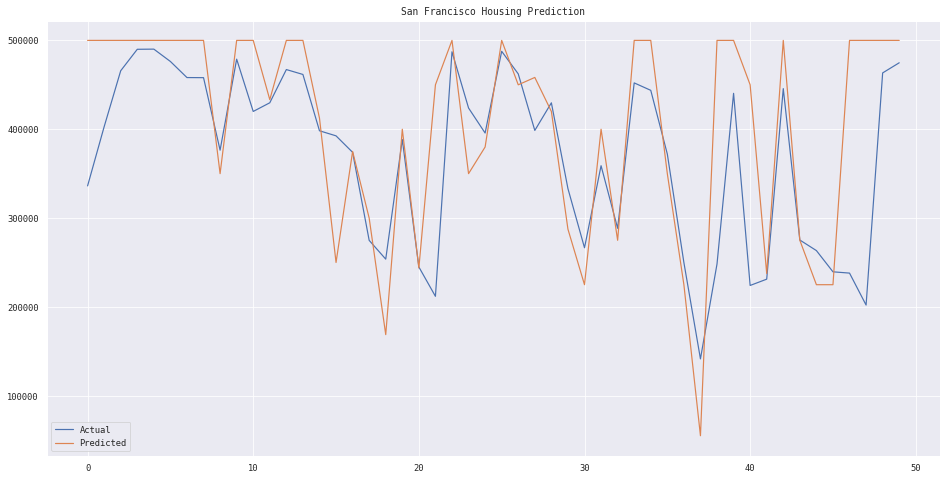

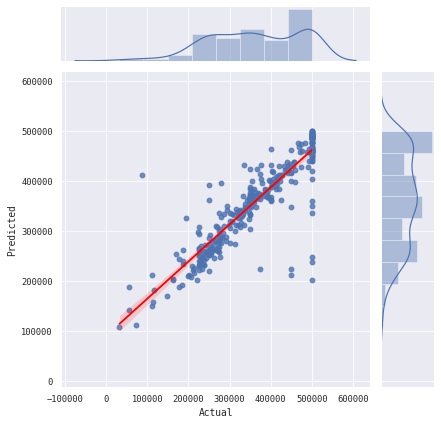

In [47]:
# predict the city San Francisco
precition('city', 'San Francisco')

The percentage of RMSE of model RFR for city San Diego: 13.17%


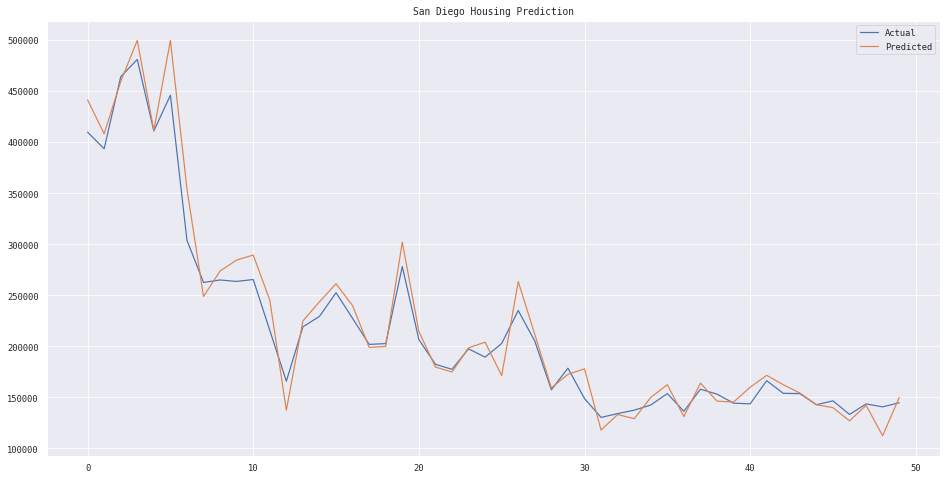

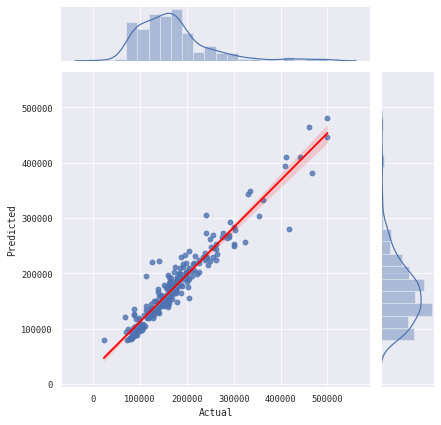

In [48]:
# predict the city San Francisco
precition('city', 'San Diego')

The percentage of RMSE of model RFR for city View Park-Windsor Hills: 14.81%


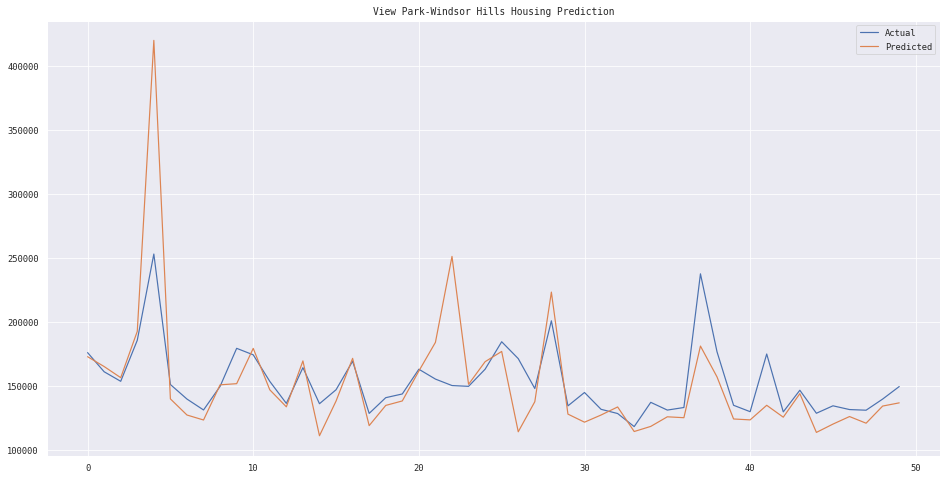

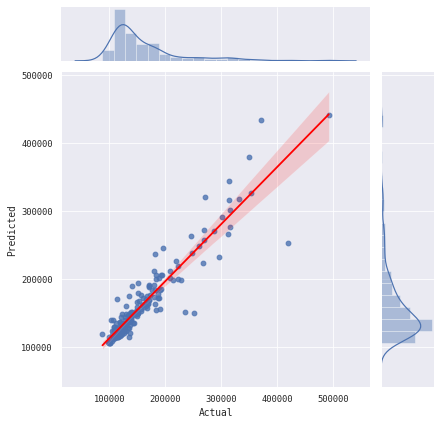

In [49]:
# predict the city View Park-Windsor Hills
precition('city', 'View Park-Windsor Hills')

### 4.2.2 County

In [50]:
# top 5 most common county 
from collections import Counter
Counter(housing_cat['county']).most_common(5)

[('Los Angeles', 5781),
 ('Orange', 1668),
 ('San Diego', 1603),
 ('Alameda', 1015),
 ('Santa Clara', 1014)]

The percentage of RMSE of model RFR for county Los Angeles: 11.43%


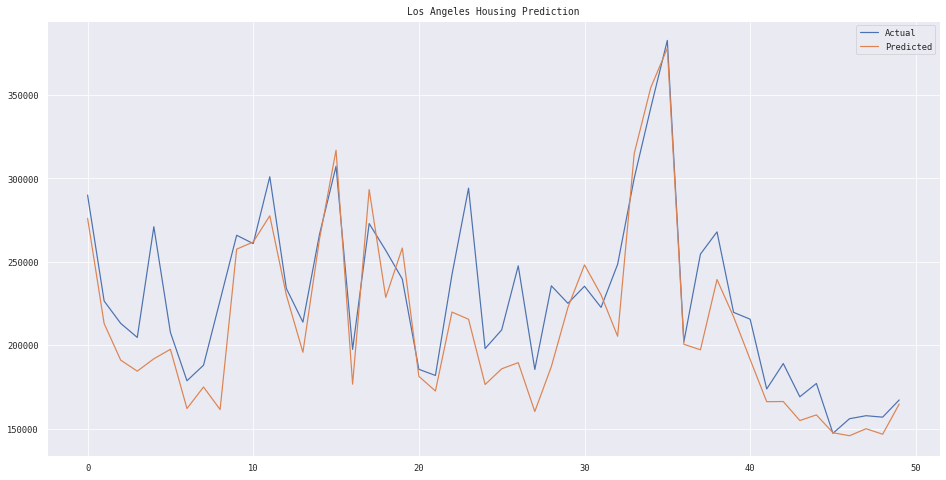

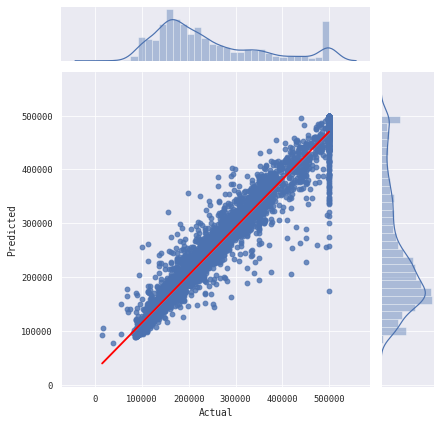

In [51]:
# predict the county Los Angeles
precition('county', 'Los Angeles')

The percentage of RMSE of model RFR for county Orange: 11.73%


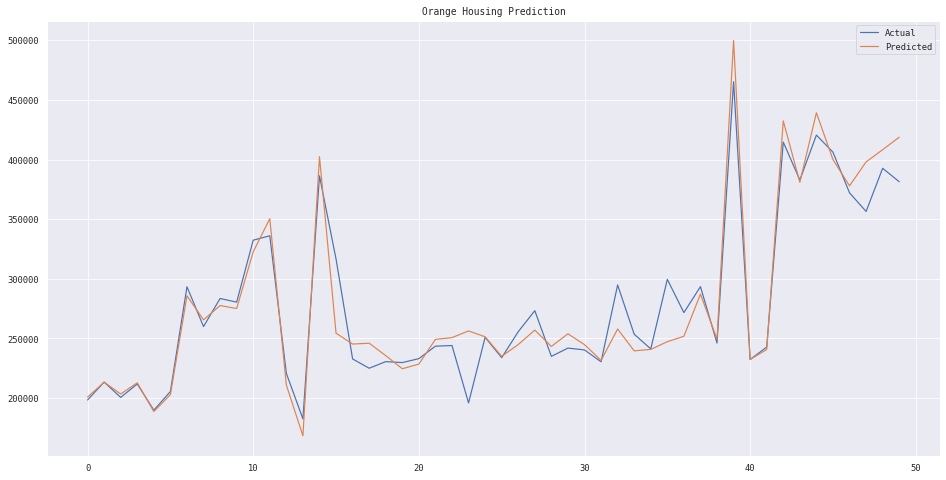

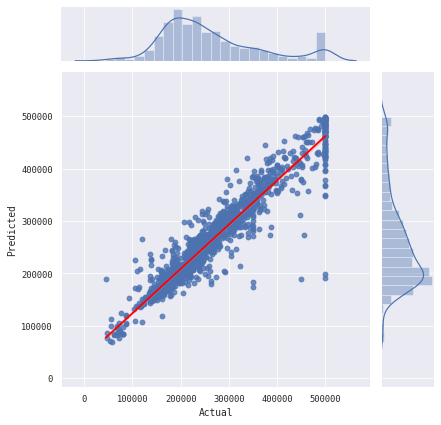

In [52]:
# predict the county Los Angeles
precition('county', 'Orange')

The percentage of RMSE of model RFR for county San Diego: 14.15%


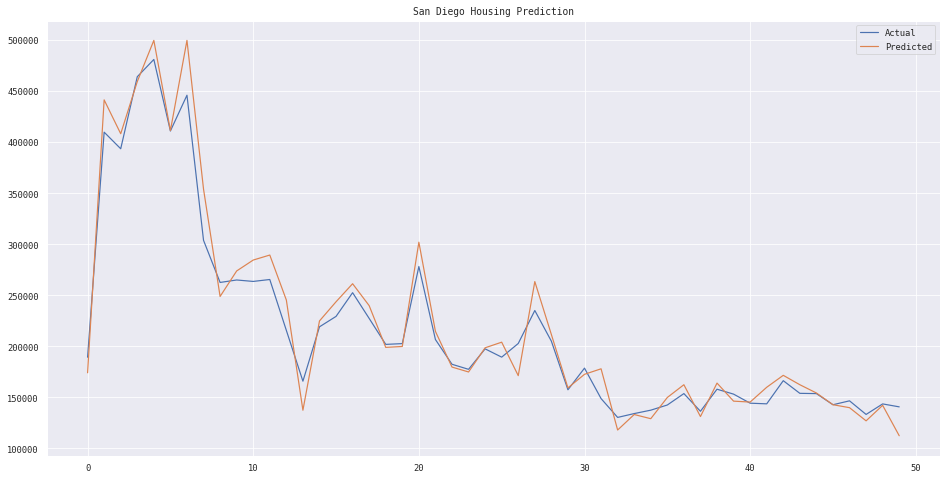

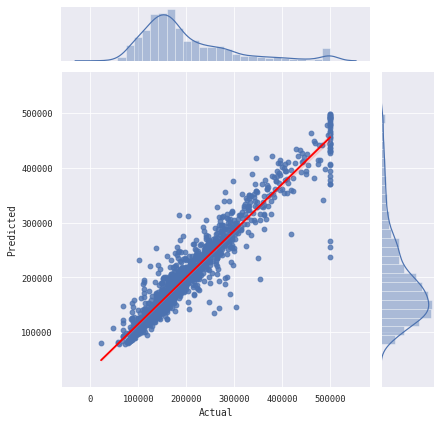

In [53]:
# predict the county Los Angeles
precition('county', 'San Diego')